# Supervised Learning Capstone Project 

------
------

## GOAL: Create a model to predict whether or not a customer will Churn .

## OBJETIVO: Crear un modelo que predice si un cliente continúa o no con el servicio

----
----






### Part 0: Imports and Read in the Data
### Parte 0: Importar y leer la información

In [116]:
#we import the libraries that we are going to use
#importamos las librerias que vamos a usar


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
#we read the csv file to use
#leemos el archivo csv a usar


df = pd.read_csv('C:\\Users\\fhube\\Downloads\\2021 Python for Machine Learning Data Science Masterclass\\1.2\\UNZIP_FOR_NOTEBOOKS_FINAL\\DATA\\Telco-Customer-Churn.csv')

In [118]:
# we check what are the columns names/features
#chequeamos las columnas y las características de la tabla

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


----------
----------------
-------------------------
--------------

### Part 1: Data check

### We are trying to see what are the datatypes and if there are null values in our dataframe or any other inconvenience


### Parte 1: Chequeo de datos

### Intentamos ver cuales son los tipos de datos presentes y si existen valores nulos u otros inconvenientes en nuestro dataframe

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


$\color{green}{\text{Most of the information is of type object, categorical, so later we will have to convert to dummie
}}$

$\color{green}{\text{La mayor parte de la información es de tipo objeto, categóricas, por lo que más adelante tendremos que convertir a dummie}}$



In [238]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
tenuregroup         0
dtype: int64

<font color='green'>We dont have any null values or missing data</font>

<font color='green'>No tenemos valores nulos o información faltante</font>


In [121]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


<font color='green'>The values on 'TotalCharges' Column are weird, so we make a distribution plot to see how the distribution looks like and why we have an std equal to the mean value and a 75% percentile close to also the mean value.</font>

<font color='green'>Los valores en la columna 'TotalCharges' son extraños, por lo que hacemos un histograma para ver cómo se ve la distribución y por qué tenemos un estándar igual al valor medio y un percentil del 75 % cercano también al valor medio.
</font>


<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

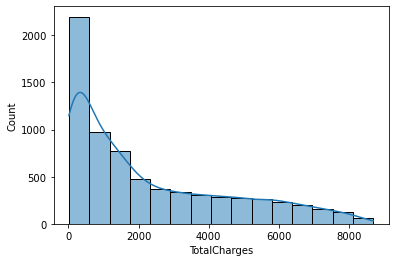

In [122]:
sns.histplot(df.TotalCharges,kde=True,bins=15)

<font color='green'>Lot of records have a 'TotalCharges' value between 0 and 2000</font>

<font color='green'>Muchos registros tienen un valor de 'TotalCharges' entre 0 y 2000</font>


----------
----------
----------
----------

### Part 2: Exploratory Data Analysis

### General Feature Exploration


### Parte 2: Análisis exploratorio de datos

### Exploración de funciones generales

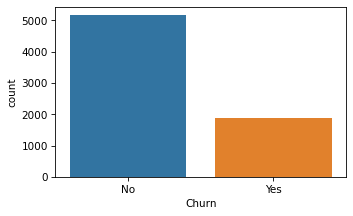

In [123]:
## plot a countplot of the column to analyze in the future as a value to predict,
## that is 'Churn' (which determines if the person discontinued the service)


## graficamos un countplot de la columna a analizar a futuro como valor a predecir,
##que es 'Churn' (la cual determina si la persona discontinuó el servicio)


plt.figure(figsize=(5,3),dpi=75)
sns.countplot(x='Churn',data=df)

plt.show()

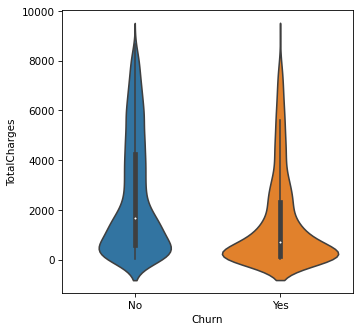

In [124]:
##graficamos la distribución de los cargos totales en cada alternativa de nuestra columna a predecir, con un Violin Plot
##plot the distribution of the total charges in each alternative of our column to predict, with a Violin Plot

plt.figure(figsize=(5,5),dpi=75)
sns.violinplot(x='Churn',y='TotalCharges',data=df)
plt.show()
##notamos que en aquellos casos donde la persona decidió cortar el servicio, 
##hubo mucho menos desviación. La media fue mas baja y también la distribución.


##note that in those cases where the person decided to cut off the service,
##there was much less deviation. The mean was lower and so was the distribution.

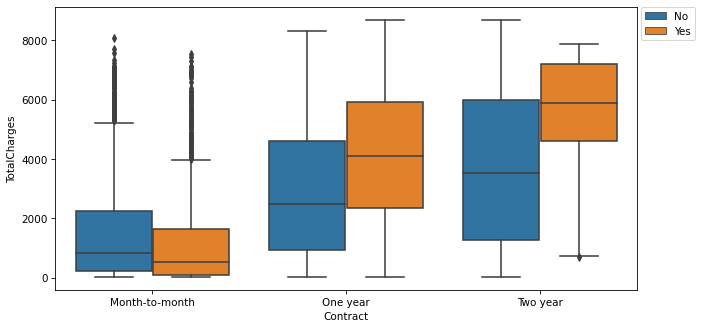

In [125]:
##graficamos la distribución de los cargos totales pero evaluiando ahora, nuevamente,
##si cortaron o no el servicio pero según también la metodología de subscripción (contract type)

plt.figure(figsize=(10,5),dpi=75)
sns.boxplot(x='Contract',y='TotalCharges',data=df,hue='Churn')
plt.legend(bbox_to_anchor=(1.1, 1), borderaxespad=0.)

plt.show()

##se observa que para personas con una suscripción mes a mes, los cargos en promedio son menores y presentan menor desviación
##que para las otras formas de contratación. También vemos que es el único caso donde hay una tendencia de la población 


<font color='green'>Conclusiones de esto: 
* La distribución de las personas que cancelaron el servicio vs los que no, es muy similar en cada tipo de contratacion. Pero a medida que la duración del contrato avanza, lo que pasa con la gente es que los costos totales van aumentando.

* Contratación mes a mes es más dificil de analizar, dado que probablemente la gente usa esto sabiendo que se va a dar de baja en el servicio. 

* Los cargos totales de la gente que se encuentra en one year y two year contract, son mayores en los casos de las personas que discontinuarion el servicio. Bajando los costos, con algún cupón de descuento, puede que sea mas probable que no discontinúe el servicio. </font>

* 

<font color='green'>Muchos registros tienen un valor de 'TotalCharges' entre 0 y 2000</font>


In [126]:
### vamos a crear un barplot mostrando la correlación entre las distintas características y la class label.

df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [127]:
df2 = df.drop('customerID',axis=1)

df2 = pd.get_dummies(df2)

In [128]:
df2.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1


In [129]:
df3 = df2.corr()


In [130]:
dfNo = df3['Churn_No']

dfYes = df3['Churn_Yes']

dfYes.sort_values().iloc[1:-1]

tenure                                    -0.354049
Contract_Two year                         -0.301552
InternetService_No                        -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
StreamingMovies_No internet service       -0.227578
TotalCharges                              -0.199484
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMetho

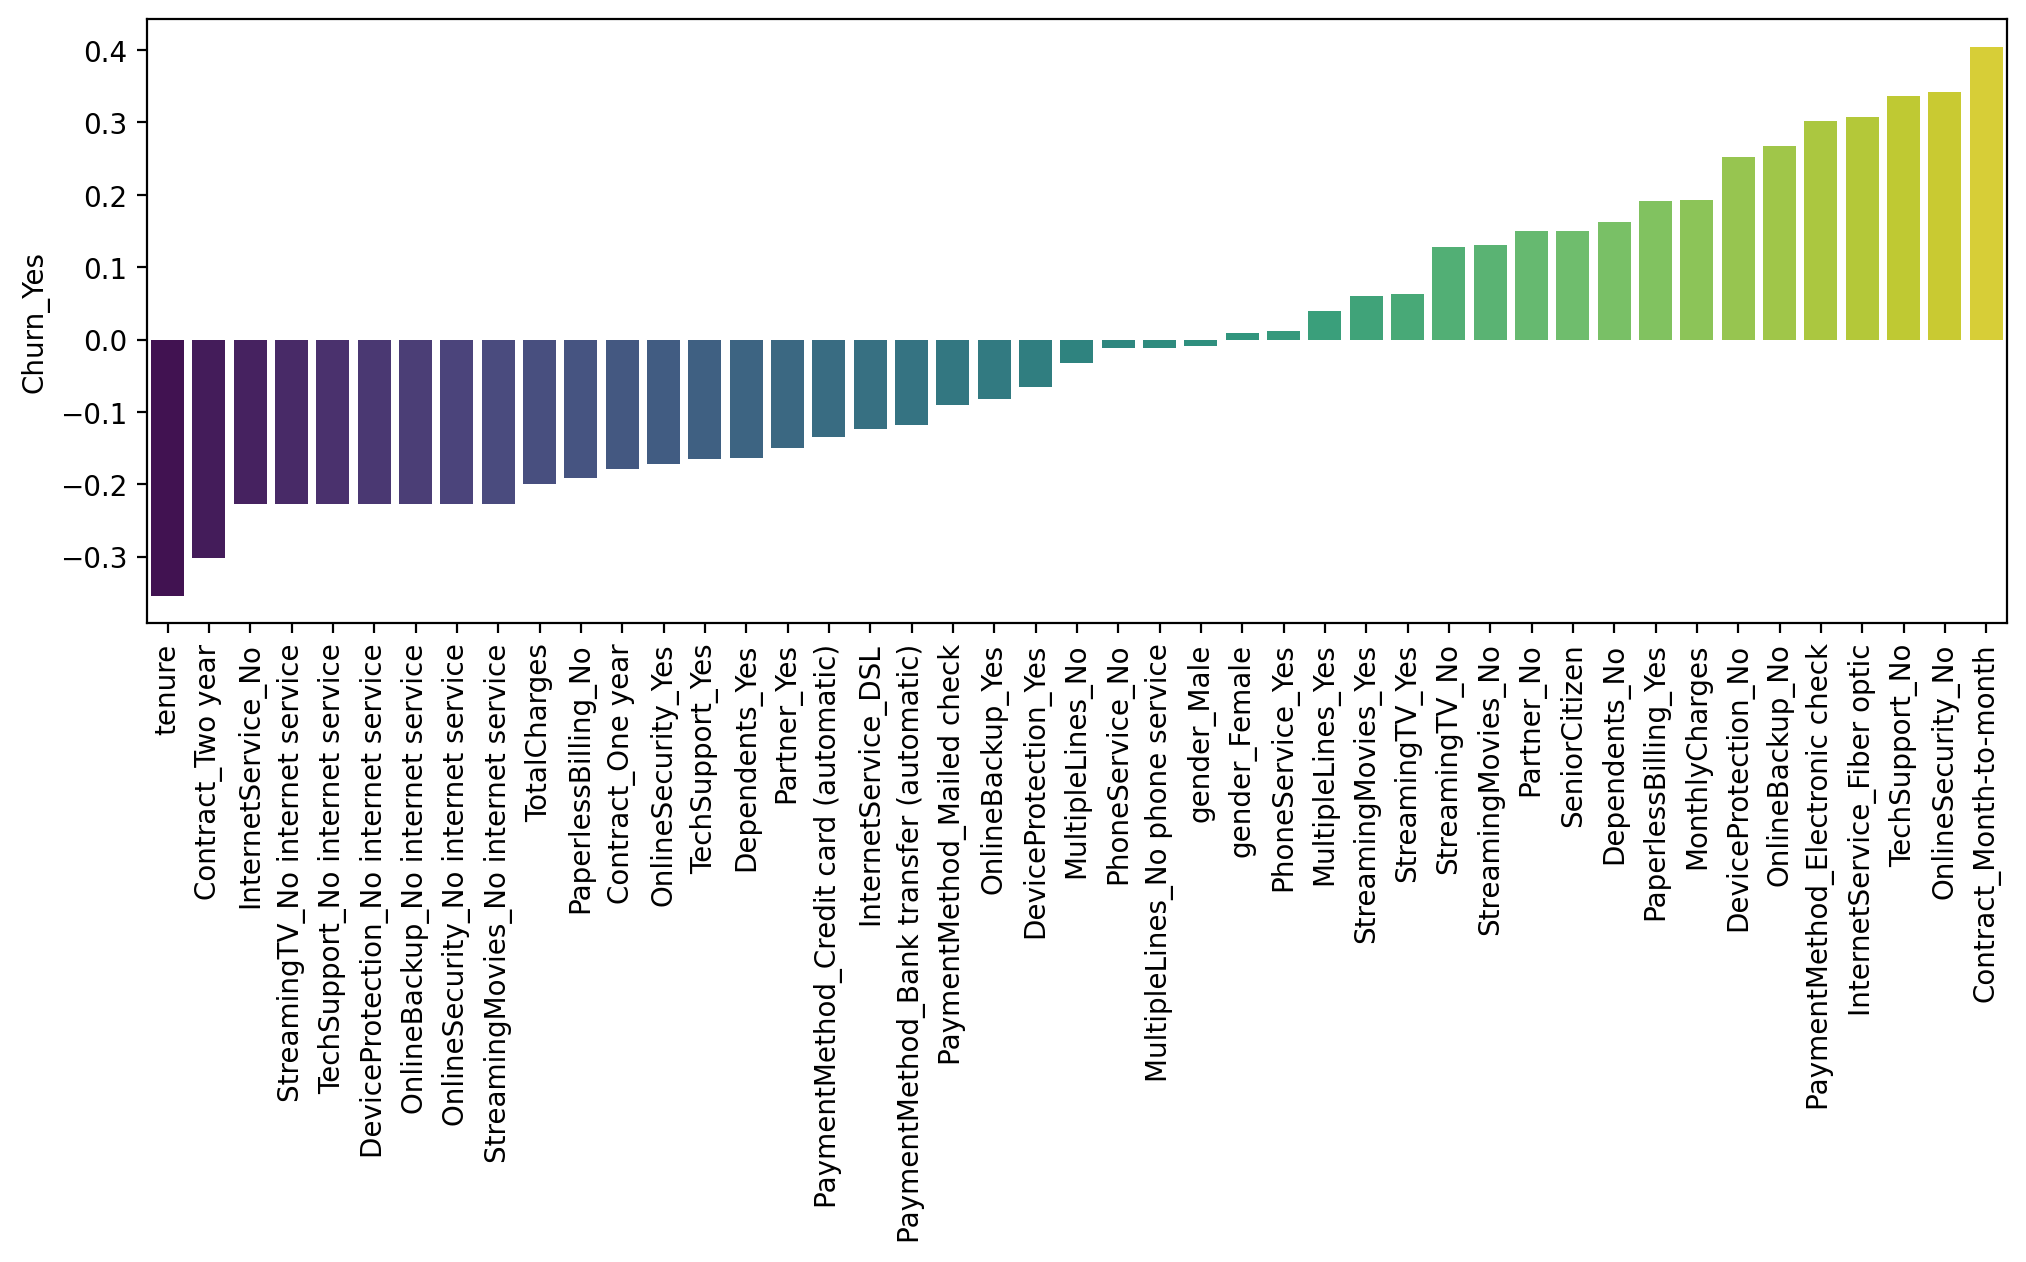

In [131]:
plt.figure(figsize=(12,4),dpi=200)
sns.barplot(x=dfYes.sort_values().iloc[1:-1].index,y=dfYes.sort_values().iloc[1:-1],palette='viridis')
plt.xticks(rotation=90);
plt.show()

<font color='green'>Correlación positiva máx con el contrato mes a mes 
Correlación negativa máx con el tenure
</font>

<font color='green'>
Max positive correlation with month-to-month contract
Max negative correlation with tenure</font>

### Part 3: Analysis with different cohorts segments and relationship with the decision to Churn (feature to predict)



### Parte 3: Análisis con diferentes segmentos y relación con la decisión de cortar el servicio (característica a predecir)



In [132]:
# tipos de contrato

df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

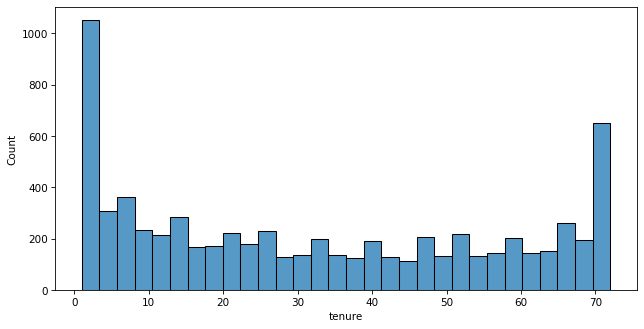

In [133]:
plt.figure(figsize=(10,5),dpi=75)
sns.histplot(data=df,x='tenure',bins=30)
plt.show()

<Figure size 750x375 with 0 Axes>

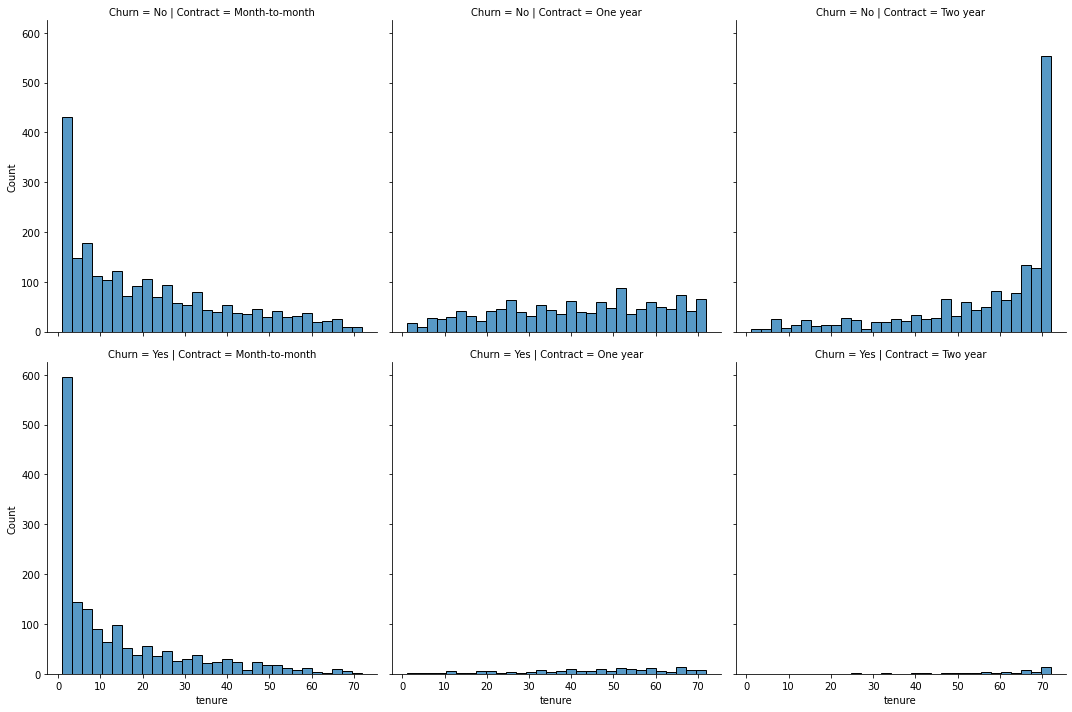

In [134]:
plt.figure(figsize=(10,5),dpi=75)
sns.displot(x=df['tenure'],bins=30,col=df['Contract'],row=df['Churn'])
plt.show()

''

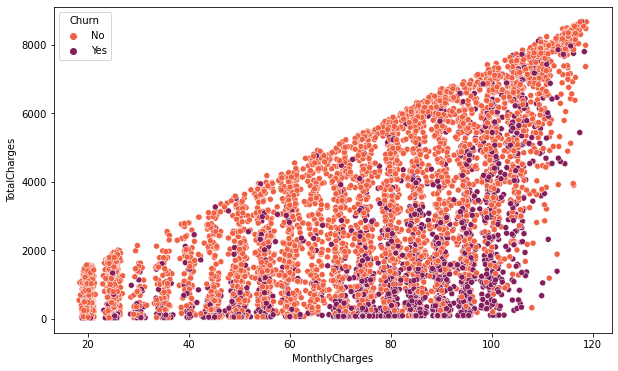

In [135]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn',palette='rocket_r')
           
;

''

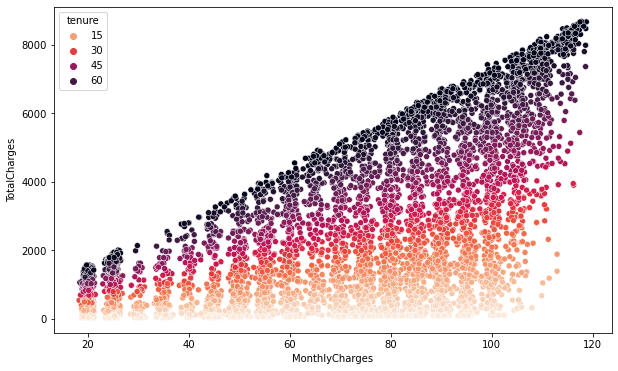

In [136]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='tenure',palette='rocket_r')
           
;

In [137]:
## creamos grupos basados en el tiermpo que estuvieron y calculamos el ratio de drop
## df['tenure'].value_counts().sort_index()

yes_churn = df.groupby(by=['Churn','tenure']).count().transpose()['Yes']

no_churn = df.groupby(by=['Churn','tenure']).count().transpose()['No']

cr = (100 * (yes_churn/(yes_churn+no_churn))).transpose()['customerID']

cr

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

<AxesSubplot:xlabel='tenure'>

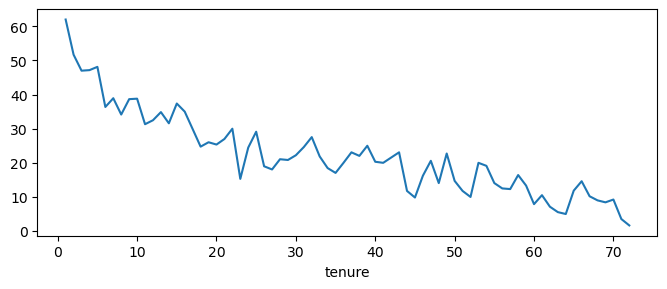

In [138]:
plt.figure(figsize=(8,3),dpi=100)
cr.plot()

#### Análizamos un poco más la información en realación al tenure, creando un grupo nuevo con 4 categorías

#### We analyze a little more the information in relation to the tenure, creating a new group with 4 categories



   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months' 

In [139]:
### creamos una función que vamos a "pasar" por la columna ¨[tenure]"
### create a function that we are going to "pass" through the column ¨[tenure]" 

def f(row):
    if row <= 12: return '0-12 Months'
    elif row <= 24: return '12-24 Months'
    elif row <= 48: return '24-48 Months'
    else: return 'Over 48 Months' 

    
df2['tenuregroup'] = df2['tenure'].apply(f)
df['tenuregroup'] = df['tenure'].apply(f)

df2.head(10)[['tenure','tenuregroup']]



,tenure,tenuregroup
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


In [140]:
df.head(10)[['tenure','tenuregroup']]


,tenure,tenuregroup
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


#### volvemos a graficar considerando esta segmentación

#### we graph again considering this segmentation

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

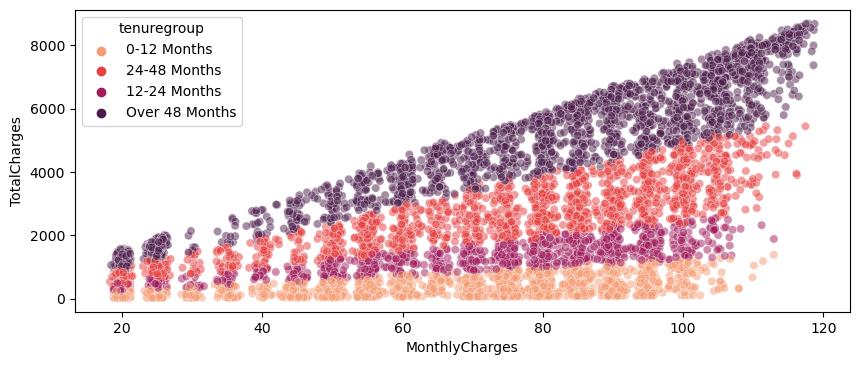

In [141]:
plt.figure(figsize=(10,4),dpi=100)

sns.scatterplot(data=df2,x='MonthlyCharges',y='TotalCharges',hue='tenuregroup',palette='rocket_r',alpha=0.5)

<AxesSubplot:xlabel='tenuregroup', ylabel='count'>

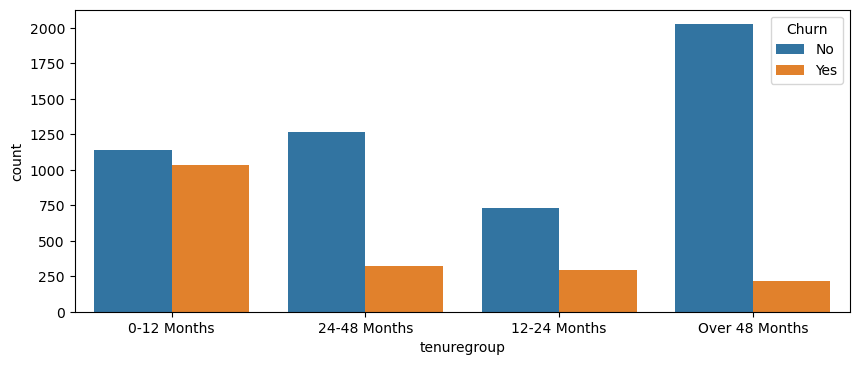

In [142]:
plt.figure(figsize=(10,4),dpi=100)

sns.countplot(x='tenuregroup',data=df,hue='Churn')

### Part 4: Predictive Modeling
#### We explore different supervised learning models to see how well they perform with this problem

### Parte 4: Modelos predictivos
#### Exploramos diferentes modelos de aprendizaje supervisado para ver qué tan bien funcionan con este problema



In [143]:
## SEPARAMOS LA DATA EN LAS CARACTERISTICAS X Y LA "Y LABEL": Churn. Usamos 
##la tabla donde creamos las variables dummy y verificamos que es util y que no para saber con qué información nos quedamos.

## WE SEPARATE THE DATA INTO THE  X feature AND THE "Y LABEL": Churn. We use the table 
##where we create the dummy variables and verify what is useful and what is not to know what information we are left with.


df2.head(30)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,tenuregroup
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,0,1,0,0,1,0,1,0,0-12 Months
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,1,0,0,0,0,1,1,0,24-48 Months
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,0,1,0,0,0,1,0,1,0-12 Months
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,24-48 Months
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0-12 Months
5,0,8,99.65,820.50,1,0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0-12 Months
6,0,22,89.10,1949.40,0,1,1,0,0,1,...,0,0,1,0,1,0,0,1,0,12-24 Months
7,0,10,29.75,301.90,1,0,1,0,1,0,...,0,1,0,0,0,0,1,1,0,0-12 Months
8,0,28,104.80,3046.05,1,0,0,1,1,0,...,0,0,1,0,0,1,0,0,1,24-48 Months
9,0,62,56.15,3487.95,0,1,1,0,0,1,...,0,1,0,1,0,0,0,1,0,Over 48 Months


In [144]:
X = df2.drop(['tenuregroup','Churn_No','Churn_Yes'],axis=1)

y = df2['Churn_Yes']



In [145]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7028,0,72,103.20,7362.90,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7029,0,11,29.60,346.45,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
7030,1,4,74.40,306.60,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [146]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn_Yes, Length: 7032, dtype: uint8

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [149]:
X_train.sort_index()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7028,0,72,103.20,7362.90,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7029,0,11,29.60,346.45,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
7030,1,4,74.40,306.60,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


## 4.1 Logistic Regression Model

## 4.1 Modelo de regresión logística


In [150]:
##escalamos la información porque aunque hay muchas variables dummies la escala con otras variables es variada
##we scale the information because although there are many dummies variables, the scale with other variables is varied


from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

In [151]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV


In [153]:
#help(LogisticRegressionCV)

In [154]:
log_model=LogisticRegressionCV()
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

In [155]:
## reportamos los parametros óptimos que afectan a las features
## we report the optimal parameters that affect the features
log_model.C_

array([166.81005372])

In [156]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [157]:
## reportamos los coeficientes que afectan cada variable del modelo. Notar que casi todas las variables tienen coeficientes muy muy pequeños


coefs = pd.Series(index=X.columns,data=log_model.coef_[0])
coefs = coefs.sort_values()

''

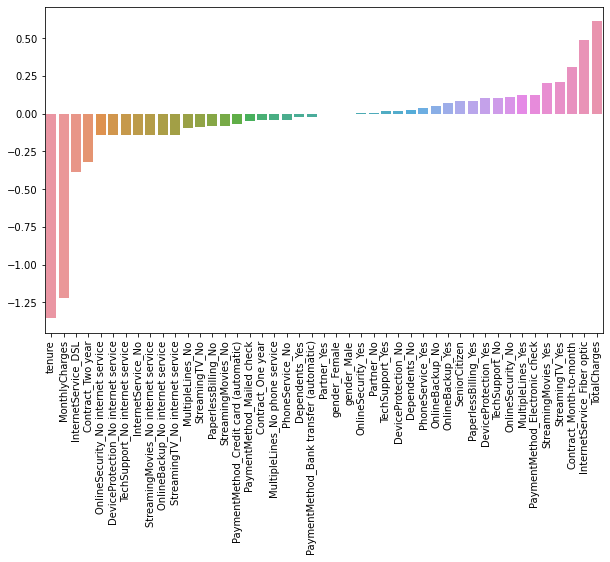

In [158]:
plt.figure(figsize=(10,6))
sns.barplot(x=coefs.sort_values().index,y=coefs.values)
plt.xticks(rotation=90)
;


In [159]:
## performance del modelo

from sklearn.metrics import confusion_matrix, classification_report,plot_confusion_matrix


In [160]:
## vemos las prdecciones del modelo

y_pred = log_model.predict(scaled_X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [161]:
confusion_matrix(y_test,y_pred)

array([[504,  53],
       [ 67,  80]], dtype=int64)

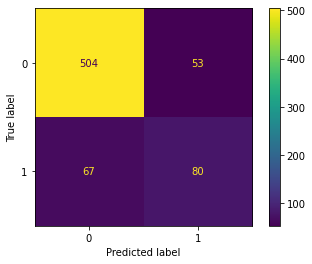

In [162]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

In [163]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       557
           1       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



## 4.2 KNN

## 4.2 KNN

In [164]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV

In [165]:
##CHOOSING A REASONABLE K



test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

''

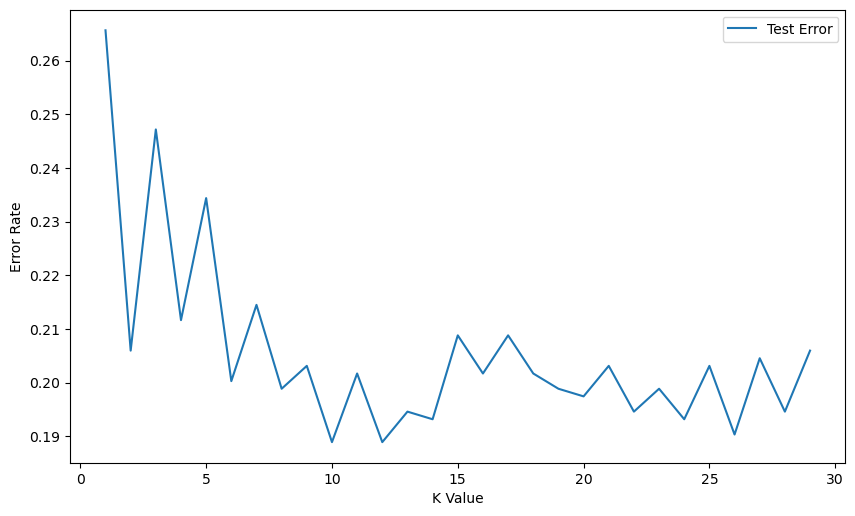

In [166]:
plt.figure(figsize=(10,6),dpi=100)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel('K Value')


;

## k = 10 es un buen valor para usar como vecinos más cercanos, podríamos hacer un full cros validation grid search para el K óptimo, esto como oportunidad de mejora de este modelo. 

In [167]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(scaled_X_train,y_train) 


KNeighborsClassifier(n_neighbors=10)

In [168]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [169]:
operations = [('scaler',scaler),('knn',knn)]

In [170]:
from sklearn.pipeline import Pipeline
pipe = Pipeline(operations)

In [171]:
pipe_pred = pipe.predict(X_test)

In [172]:
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       557
           1       0.56      0.45      0.50       147

    accuracy                           0.81       704
   macro avg       0.71      0.68      0.69       704
weighted avg       0.80      0.81      0.80       704



In [173]:
confusion_matrix(y_test,pipe_pred)

array([[505,  52],
       [ 81,  66]], dtype=int64)

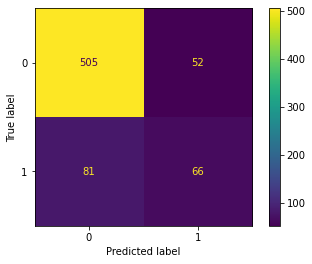

In [174]:
plot_confusion_matrix(knn,scaled_X_test,y_test)

## 4.3. Single Decision Tree

In [175]:
from sklearn.tree import DecisionTreeClassifier

In [176]:
##CHOOSING A REASONABLE deapth



tree_test_error_rates = []


for k in range(1,30):
    single_tree_model = DecisionTreeClassifier(max_depth=k)
    single_tree_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = single_tree_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    tree_test_error_rates.append(test_error)

''

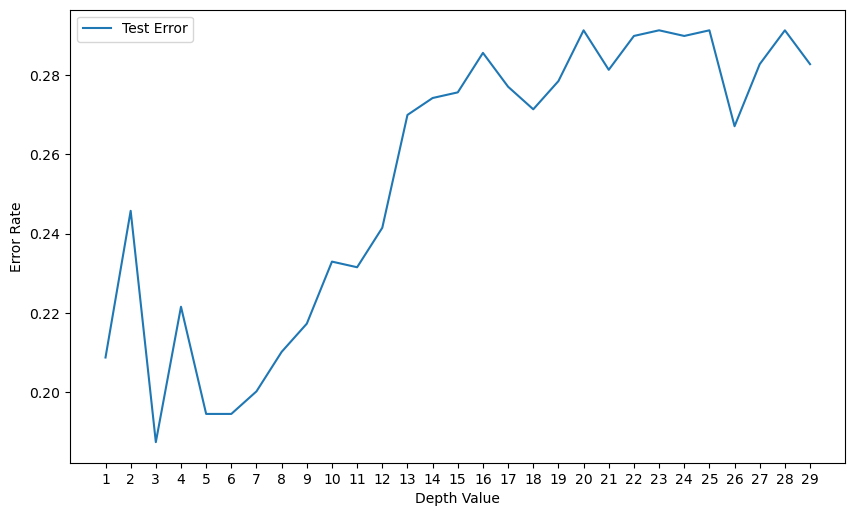

In [177]:
plt.figure(figsize=(10,6),dpi=100)
xt =range(1,30)
plt.plot(xt,tree_test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel('Depth Value')
plt.xticks(xt)

;

In [178]:
single_tree_model = DecisionTreeClassifier(max_depth=5)

In [179]:
single_tree_model.fit(scaled_X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [180]:
single_tree_pred = single_tree_model.predict(scaled_X_test)

single_tree_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [181]:
confusion_matrix(y_test,single_tree_pred)

array([[495,  62],
       [ 75,  72]], dtype=int64)

In [182]:
print(classification_report(y_test,single_tree_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       557
           1       0.54      0.49      0.51       147

    accuracy                           0.81       704
   macro avg       0.70      0.69      0.70       704
weighted avg       0.80      0.81      0.80       704



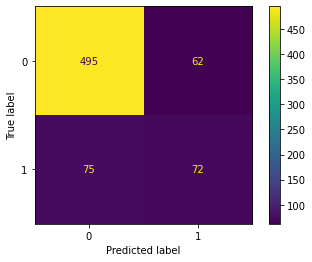

In [183]:
plot_confusion_matrix(single_tree_model,scaled_X_test,y_test)

In [184]:
##feature importances

single_tree_model.feature_importances_

array([0.00551126, 0.17164216, 0.02873713, 0.03915293, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00894521, 0.        ,
       0.        , 0.15503691, 0.        , 0.00514343, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03118626, 0.        , 0.        ,
       0.        , 0.        , 0.00312157, 0.        , 0.        ,
       0.00129733, 0.52252193, 0.00356126, 0.        , 0.        ,
       0.00278817, 0.        , 0.        , 0.02135444, 0.        ])

In [185]:
len(single_tree_model.feature_importances_)

45

In [186]:
fi_st = pd.DataFrame(index=X.columns,data = single_tree_model.feature_importances_,columns=['Feature Importance'])

fi_st = fi_st.sort_values(by=['Feature Importance'],ascending = False)

fi_st

,Feature Importance
Contract_Month-to-month,0.522522
tenure,0.171642
InternetService_Fiber optic,0.155037
TotalCharges,0.039153
TechSupport_No,0.031186
MonthlyCharges,0.028737
PaymentMethod_Electronic check,0.021354
MultipleLines_No phone service,0.008945
SeniorCitizen,0.005511
OnlineSecurity_No,0.005143


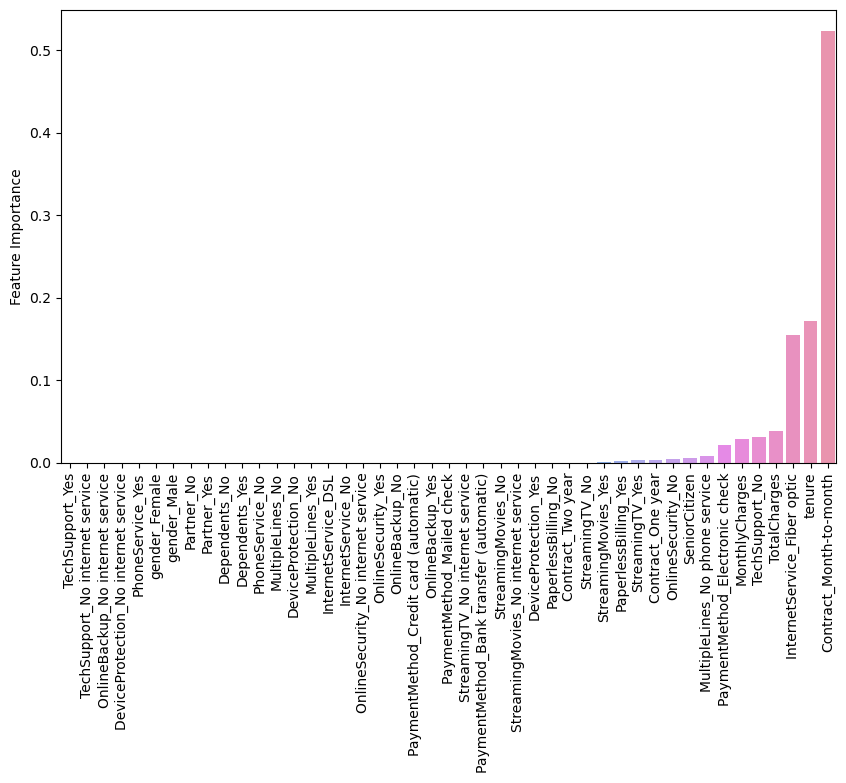

In [187]:
plt.figure(figsize=(10,6),dpi=100)
sns.barplot(data = fi_st.sort_values('Feature Importance'),x= fi_st.sort_values('Feature Importance').index,y='Feature Importance')
plt.xticks(rotation=90)    
plt.show()

In [188]:
from sklearn.tree import plot_tree

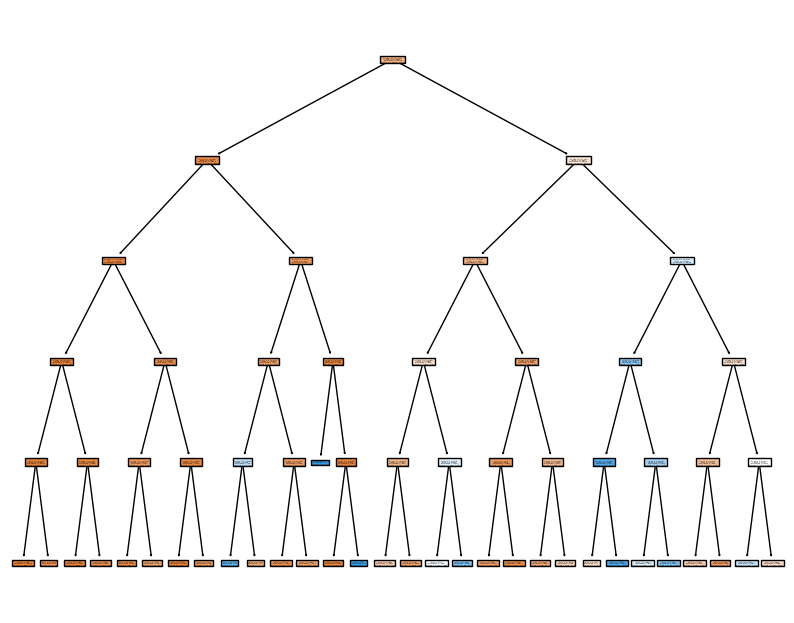

In [189]:
plt.figure(figsize=(10,8),dpi=100)
plot_tree(single_tree_model,filled=True)

plt.show()

### 4.4 Random Forest

In [190]:
from sklearn.ensemble import RandomForestClassifier

In [191]:
##CHOOSING A REASONABLE ESTIMATOR



rf_test_error_rates = []


for k in range(1,30):
    rf = RandomForestClassifier(n_estimators=k,max_features='auto')
    rf.fit(scaled_X_train,y_train)
    rf_preds = rf.predict(scaled_X_test)
    rf_test_error_rates.append(1-accuracy_score(rf_preds,y_test))

''

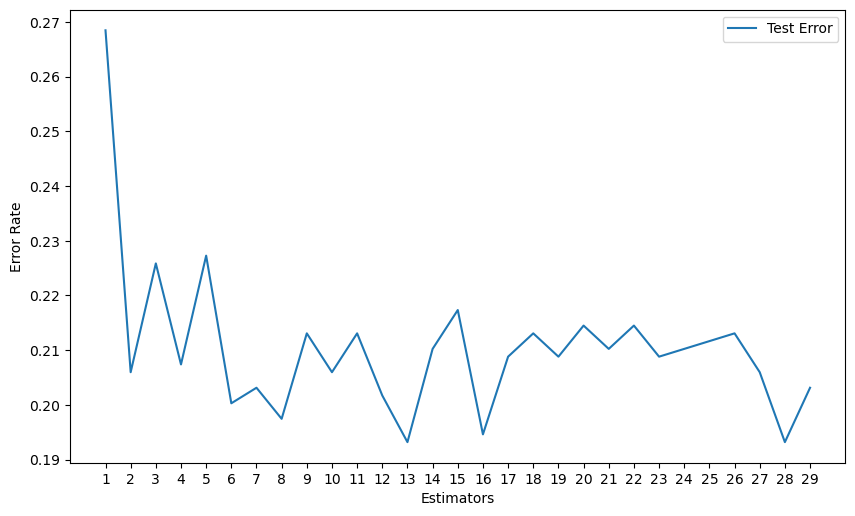

In [192]:
plt.figure(figsize=(10,6),dpi=100)
xt =range(1,30)
plt.plot(xt,rf_test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel('Estimators')
plt.xticks(xt)

;

In [193]:
rf_model = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101
)
rf_model.fit(scaled_X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [194]:
rf_preds = rf_model.predict(scaled_X_test)

In [195]:
print(classification_report(y_test,rf_preds))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       557
           1       0.57      0.43      0.49       147

    accuracy                           0.81       704
   macro avg       0.72      0.67      0.69       704
weighted avg       0.80      0.81      0.80       704



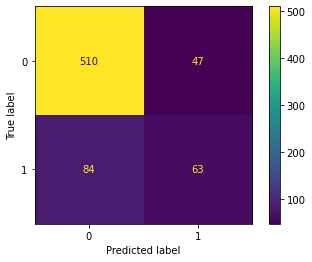

In [196]:
plot_confusion_matrix(rf_model,scaled_X_test,y_test)

In [197]:
confusion_matrix(y_test,rf_preds)

array([[510,  47],
       [ 84,  63]], dtype=int64)

### Boosting the tree
#### Usamos AdaBoost y Gradient Boosting para crear nuevos modelos y evaluamos resultados

### Pendientes

#### We use AdaBoost and Gradient Boosting to create new models and evaluate results

In [198]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### 4.4.1. AdaBoost

In [199]:
#help(AdaBoostClassifier)

In [200]:
## hacemos un primer stump con un solo estimador y hacemos 
## el cálculo de que feature hace el mejor split inicialmente

## do a first stump with a single estimator and 
## calculate which feature makes the best split initially

abt_model = AdaBoostClassifier(n_estimators=1)

In [201]:
abt_model.fit(scaled_X_train,y_train)

AdaBoostClassifier(n_estimators=1)

In [202]:
abt_predictions = abt_model.predict(scaled_X_test)

In [203]:
abt_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [204]:
print(classification_report(y_test,abt_predictions))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       557
           1       0.00      0.00      0.00       147

    accuracy                           0.79       704
   macro avg       0.40      0.50      0.44       704
weighted avg       0.63      0.79      0.70       704



C:\Users\fhube\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fhube\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fhube\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [205]:
confusion_matrix(y_test,abt_predictions)

array([[557,   0],
       [147,   0]], dtype=int64)

In [206]:
abt_model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [207]:
abt_model.feature_importances_.argmax()

36

In [208]:
X.columns[36]

#como era de esperar, el month to month contract sigue siendo 
#una de las features de mayor importancia para el primer split


#as expected, the month to month contract is still
#one of the most important features for the first split

'Contract_Month-to-month'

In [209]:
#analyzing performance as more weak learners are added
#analizando la performance cuando agrego más weak learners

abt_error_rates = []

for n in range (1,100):
    abt = AdaBoostClassifier(n_estimators=n)
    abt.fit(scaled_X_train,y_train)
    abt_preds = abt.predict(scaled_X_test)
    abt_error_rates.append(1-accuracy_score(abt_preds,y_test))
    
     

''

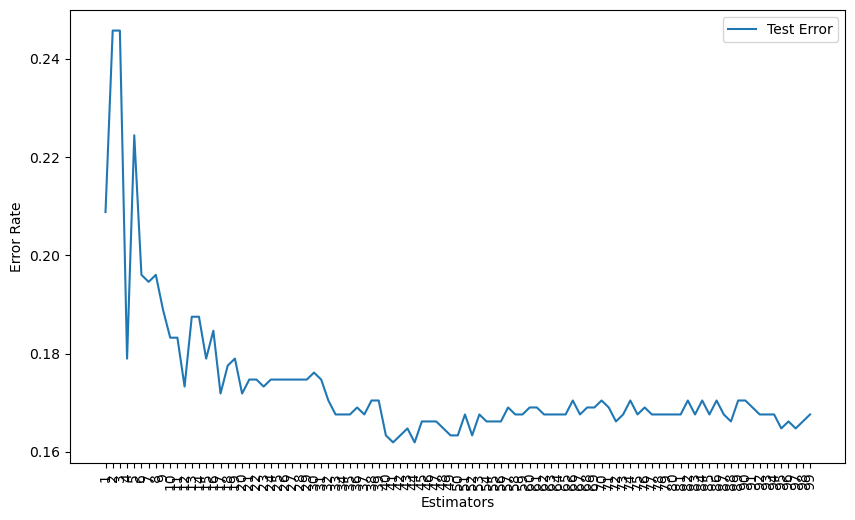

In [210]:
plt.figure(figsize=(10,6),dpi=100)
xt = range(1,100)
plt.plot(xt,abt_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel('Estimators')
plt.xticks(xt,rotation=90)
;

In [211]:
abt

AdaBoostClassifier(n_estimators=99)

In [212]:
abt.feature_importances_

array([0.01010101, 0.17171717, 0.21212121, 0.43434343, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01010101, 0.        , 0.        ,
       0.01010101, 0.01010101, 0.        , 0.01010101, 0.        ,
       0.01010101, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01010101, 0.        , 0.        ,
       0.        , 0.        , 0.01010101, 0.        , 0.        ,
       0.01010101, 0.03030303, 0.01010101, 0.01010101, 0.        ,
       0.01010101, 0.01010101, 0.01010101, 0.01010101, 0.        ])

In [213]:
abt_feats = pd.DataFrame(index=X.columns,data=abt.feature_importances_,columns=['Importance'])
abt_feats[abt_feats['Importance']>0].sort_values

<bound method DataFrame.sort_values of                                          Importance
SeniorCitizen                              0.010101
tenure                                     0.171717
MonthlyCharges                             0.212121
TotalCharges                               0.434343
MultipleLines_No                           0.010101
InternetService_DSL                        0.010101
InternetService_Fiber optic                0.010101
OnlineSecurity_No                          0.010101
OnlineSecurity_Yes                         0.010101
TechSupport_No                             0.010101
StreamingTV_Yes                            0.010101
StreamingMovies_Yes                        0.010101
Contract_Month-to-month                    0.030303
Contract_One year                          0.010101
Contract_Two year                          0.010101
PaperlessBilling_Yes                       0.010101
PaymentMethod_Bank transfer (automatic)    0.010101
PaymentMethod_Credit card

In [214]:
## recreo el modelo con los n_estimators que sacamos

abt_model = AdaBoostClassifier(n_estimators=41)

In [215]:
abt_model.fit(scaled_X_train,y_train)

AdaBoostClassifier(n_estimators=41)

In [216]:
abt_predictions = abt_model.predict(scaled_X_test)
abt_predictions

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [217]:
print(classification_report(y_test,abt_predictions))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       557
           1       0.63      0.54      0.58       147

    accuracy                           0.84       704
   macro avg       0.76      0.73      0.74       704
weighted avg       0.83      0.84      0.83       704



In [218]:
print(confusion_matrix(y_test,abt_predictions))

[[511  46]
 [ 68  79]]


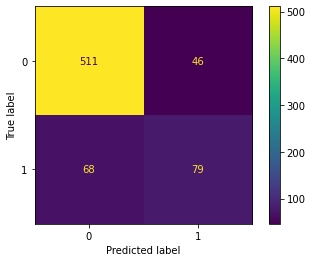

In [219]:
plot_confusion_matrix(abt_model,scaled_X_test,y_test)

### 4.4.2. Gradient Boosting

In [220]:
from sklearn.model_selection import GridSearchCV

In [221]:
param_grid = {"n_estimators":[1,5,10,40,41,45,50],'max_depth':[1,5,10,15,26,40]}

In [232]:
gbt_model = GradientBoostingClassifier()

In [233]:
gbt_model.fit(scaled_X_train,y_train)

GradientBoostingClassifier()

In [234]:
grid = GridSearchCV(gbt_model,param_grid)

In [224]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [1, 5, 10, 15, 26, 40],
                         'n_estimators': [1, 5, 10, 40, 41, 45, 50]})

In [225]:
grid.best_params_

{'max_depth': 5, 'n_estimators': 41}

In [227]:
gbt_preds = grid.predict(scaled_X_test)

In [228]:
gbt_preds

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [235]:
print(classification_report(y_test,gbt_preds))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       557
           1       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



In [236]:
print(confusion_matrix(y_test,gbt_preds))

[[503  54]
 [ 74  73]]


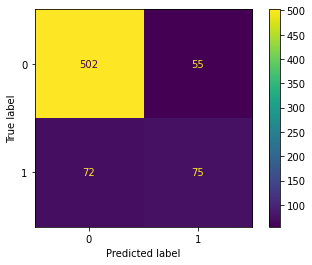

In [237]:
plot_confusion_matrix(gbt_model,scaled_X_test,y_test)

### Pendings

### Pendientes

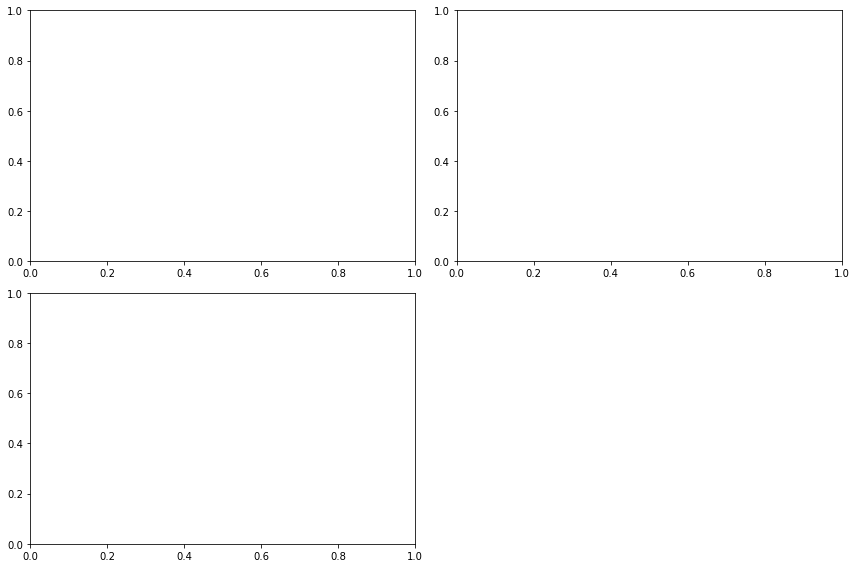

In [105]:
## Varias gráficas diferentes en un mismo frame?

## Several different graphs in the same frame?


fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(12,8))

for i,el in enumerate(list(df.columns.values)[:-1]):
    a = sns.boxplot(data=df,y='TotalCharges',x='Contract',hue='Churn')

fig.delaxes(axes[1,1]) # remove empty subplot
plt.tight_layout() 

plt.show()
#axes[0].plot()
#axes[0].set_title("July 16th, 2007")
#axes[1].plot(labels,july16_2020,label='july16_2020')
#axes[1].set_title("July 16th, 2020")

## REVISAR LOS ESCALADOS DEL MODELO